In [4]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import nibabel as nib
import matplotlib.pyplot as plt
# there was some problems for using import tensorflow as tf
# the way I found to fix it is the next two lines
import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior()

import tensorflow as tf
import tensorflow.keras
import numpy as np
import os

import random

from tensorflow.keras import backend
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, GlobalAveragePooling2D, Dense, GlobalAveragePooling3D
from tensorflow.keras.layers import Input, Conv2D, ZeroPadding2D, BatchNormalization, Dropout
from tensorflow.keras.layers import Conv3D,MaxPooling3D, Flatten, Dense, ReLU, Add
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.utils import to_categorical
from scipy.ndimage import zoom

from tensorflow.keras.applications.vgg16 import VGG16

#reduce the size of model weights
from tensorflow.keras import backend as K
K.set_floatx('float32')

In [3]:
def model(input_shape):
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)
    
    X_conv1 = Conv3D(32, (3, 3, 3), strides = (1, 1,1), padding='same', name = 'conv1',data_format="channels_last", activation='linear')(X_input)
    X_batch1 = BatchNormalization()(X_conv1)
    X_relu1 = ReLU()(X_batch1)

    
    X_conv2 = Conv3D(32, (3, 3, 3), strides = (1, 1,1), padding='same', name = 'conv2',data_format="channels_last", activation='linear')(X_relu1)
    X_batch2 = BatchNormalization()(X_conv2)
    X_relu2 = ReLU()(X_batch2)

    
    X_conv3 = Conv3D(64, (3, 3, 3), strides = (2, 2,2), padding='same', name = 'conv3',data_format="channels_last", activation='linear')(X_relu2)

   
    X_batch4 = BatchNormalization()(X_conv3)    
    X_relu4 = ReLU()(X_batch4)    

    
    X_conv5 = Conv3D(64, (3, 3, 3), strides = (1, 1,1), padding='same', name = 'conv5',data_format="channels_last", activation='linear')(X_relu4)
    X_batch5 = BatchNormalization()(X_conv5)
    X_relu5 = ReLU()(X_batch5)

    
    X_conv6 = Conv3D(64, (3, 3, 3), strides = (1, 1,1), padding='same', name = 'conv6',data_format="channels_last", activation='linear')(X_relu5)

    
    X_added7 = Add()([X_conv3, X_conv6])
    

    X_batch8 = BatchNormalization()(X_added7)    
    X_relu8 = ReLU()(X_batch8)    

    

    X_conv9 = Conv3D(64, (3, 3, 3), strides = (1, 1,1), padding='same', name = 'conv7',data_format="channels_last", activation='linear')(X_relu8)    
    X_batch9 = BatchNormalization()(X_conv9)
    X_relu9 = ReLU()(X_batch9)

    
    X_conv10 = Conv3D(64, (3, 3, 3), strides = (1, 1,1), padding='same', name = 'conv10',data_format="channels_last", activation='linear')(X_relu9)

    
    X_added11 = Add()([X_conv10, X_added7])
    
    
    X_batch12 = BatchNormalization()(X_added11)    
    X_relu12 = ReLU()(X_batch12) 


    X_conv13 = Conv3D(64, (3, 3, 3), strides = (2, 2,2), padding='same', name = 'conv13',data_format="channels_last", activation='linear')(X_relu12)

    
    X_batch14 = BatchNormalization()(X_conv13)    
    X_relu14 = ReLU()(X_batch14)    

    X_conv15 = Conv3D(64, (3, 3, 3), strides = (1, 1,1), padding='same', name = 'conv15',data_format="channels_last", activation='linear')(X_relu14)
    X_batch15 = BatchNormalization()(X_conv15)
    X_relu15 = ReLU()(X_batch15)

    
    X_conv16 = Conv3D(64, (3, 3, 3), strides = (1, 1,1), padding='same', name = 'conv16',data_format="channels_last", activation='linear')(X_relu15)
    
    
    X_added17 = Add()([X_conv16, X_conv13])
    
  
    X_batch18 = BatchNormalization()(X_added17)    
    X_relu18 = ReLU()(X_batch18)    
    
    
    X_conv19 = Conv3D(64, (3, 3, 3), strides = (1, 1,1), padding='same', name = 'conv19',data_format="channels_last", activation='linear')(X_relu18)
    X_batch19 = BatchNormalization()(X_conv19)
    X_relu19 = ReLU()(X_batch19)
    
    
    X_conv20 = Conv3D(64, (3, 3, 3), strides = (1, 1,1), padding='same', name = 'conv20',data_format="channels_last", activation='linear')(X_relu19)
    
    
    X_added21 = Add()([X_conv20, X_added17])
    
    
    X_batch22 = BatchNormalization()(X_added21)    
    X_relu22 = ReLU()(X_batch22) 
    
    
    X_conv23 = Conv3D(128, (3, 3, 3), strides = (2,2,2), padding='same', name = 'conv23',data_format="channels_last", activation='linear')(X_relu22)

    X_batch24 = BatchNormalization()(X_conv23)    
    X_relu24 = ReLU()(X_batch24)    


    X_conv25 = Conv3D(128, (3, 3, 3), strides = (1, 1,1), padding='same', name = 'conv25',data_format="channels_last", activation='linear')(X_relu24)
    X_batch25 = BatchNormalization()(X_conv25)
    X_relu25 = ReLU()(X_batch25)
    
    
    X_conv26 = Conv3D(128, (3, 3, 3), strides = (1, 1,1), padding='same', name = 'conv26',data_format="channels_last", activation='linear')(X_relu25)
    
    
    X_added27 = Add()([X_conv26, X_conv23])
    
    
    X_batch28 = BatchNormalization()(X_added27)    
    X_relu28 = ReLU()(X_batch28)    
    
    
    X_conv29 = Conv3D(128, (3, 3, 3), strides = (1, 1,1), padding='same', name = 'conv29',data_format="channels_last", activation='linear')(X_relu28)
    X_batch29 = BatchNormalization()(X_conv29)
    X_relu29 = ReLU()(X_batch29)
    
    
    X_conv30 = Conv3D(128, (3, 3, 3), strides = (1, 1,1), padding='same', name = 'conv30',data_format="channels_last", activation='linear')(X_relu29)
    
    
    X_added31 = Add()([X_conv30, X_added27])
    
    
    X_pool32 = MaxPooling3D(pool_size=(7,7,7), strides=None, data_format=None, name = 'pool32')(X_added31) # it should be 5,5,5,
    
    
    X_flat33 = Flatten()(X_pool32)
    
    
    X_dense34 = Dense(128, activation='relu', name='fc34')(X_flat33)
    
    
    X_out35 = Dense(1, activation='sigmoid', name='out')(X_dense34)
            
    
    model = Model(inputs = X_input, outputs = X_out35, name='HappyModel')    
    
    return model

In [4]:
model1 = model ((110,110,110,1))

W1207 22:44:28.593074 140506542352128 deprecation.py:506] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
#Parameters (Modify as needed)
img_size_x = 110
img_size_y = 110
img_size_z = 110

batch_size = 10
classes = 2
epochs = 50
lr = 27*1e-6

early_stopping_patience = 20
class_names = ['NC', 'AD']

In [6]:
def load_dataset_clean():
    AD_directory = "/home/ubuntu/project/Data/AD_clean/"
    NC_directory = "/home/ubuntu/project/Data/NC_clean/"
    
    AD_list = os.listdir(AD_directory)
    NC_list = os.listdir(NC_directory)
    

    All_directory = "/home/ubuntu/project/Data/AD_NC_Clean/"

    X = np.zeros((111,img_size_x,img_size_y,img_size_z,1))
    Y = np.zeros(111)
    
    l = os.listdir(All_directory)
    random.shuffle(l)
   
    
    objindex = 0
    for i, filename in enumerate(l):
        if (filename.startswith('.')):
            print ("hidden file")
        else:
            epi_img = nib.load(All_directory + filename)
            x = epi_img.get_fdata()
            x = (x-x.min())/x.max()
            
            x = np.expand_dims(x, axis=3)
            X[objindex] = x
            y = 0
            if filename in AD_list:
                y = 1
                
            Y[objindex] = y
            
            objindex += 1
            
    return X, Y

In [7]:
X, Y = load_dataset_clean()

In [10]:
sum(Y)

50.0

In [9]:
#load model weights, note that we will only use the weights for the convolution layer
from tensorflow.keras import losses
# model1.load_weights('my_model_weights_0_14.h5')
# opt = keras.optimizers.Adadelta(clipnorm=1.)
opt = tf.keras.optimizers.Adam(lr=0.0001,beta_1=0.9, beta_2=0.99, amsgrad=False)
# def batch_callback():
#     print('hello')
    
model1.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])

# model1.compile(loss=losses.mean_squared_error, optimizer='sgd', metrics=['categorical_accuracy'])


m = model1.fit(X[0:70],Y[0:70],validation_data=(X[70:100],Y[70:100]),batch_size=2,epochs=20, verbose=1)
# model1.train_on_batch(X[0:10], Y[0:10])

W1207 21:17:36.251936 140653116430080 deprecation.py:323] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 70 samples, validate on 30 samples
Epoch 1/20
70/70 [==============================] - 138s 2s/sample - loss: 1.4474 - acc: 0.5286 - val_loss: 0.6972 - val_acc: 0.4667
Epoch 2/20
70/70 [==============================] - 127s 2s/sample - loss: 1.1806 - acc: 0.5286 - val_loss: 0.7274 - val_acc: 0.4667
Epoch 3/20
70/70 [==============================] - 128s 2s/sample - loss: 0.5511 - acc: 0.7714 - val_loss: 0.7306 - val_acc: 0.4667
Epoch 4/20
70/70 [==============================] - 128s 2s/sample - loss: 0.7434 - acc: 0.7143 - val_loss: 0.7723 - val_acc: 0.4667
Epoch 5/20
70/70 [==============================] - 128s 2s/sample - loss: 0.6206 - acc: 0.7143 - val_loss: 0.7959 - val_acc: 0.4667
Epoch 6/20
70/70 [==============================] - 128s 2s/sample - loss: 0.2646 - acc: 0.8571 - val_loss: 0.8356 - val_acc: 0.4667
Epoch 7/20
70/70 [==============================] - 128s 2s/sample - loss: 0.1902 - acc: 0.9286 - val_loss: 0.8741 - val_acc: 0.4667
Epoch 8/20
70/70 [=======

In [ ]:
# m = fit_model(model, "v1", train_data, train_labels, val_data, val_labels)

In [10]:
model1.save_weights('Moha-Final-resnet.h5')

In [8]:
def evaluate_model(m, weights, test_data, test_labels):    
     
    plt.close('all')

    m.load_weights(weights)
    m.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    print ("Done compiling model.")
    
    prediction = m.predict(test_data)
    #prediction_labels = np_utils.to_categorical(np.argmax(prediction, axis=1), nb_classes)
    
    #print (prediction)
    
    pred = []
    for p in prediction:
        if float(p[0]) > 0.5:
            pred.append(1)
        else:
            pred.append(0)
    print (pred)
    
    print ('Accuracy on test data:', accuracy_score(test_labels, pred))

    print ('Classification Report')
    print (classification_report(test_labels, pred, target_names = ['NC', 'AD']))
    
    cm = confusion_matrix(test_labels,  pred)

    print(cm)


    fig, ax = plot_confusion_matrix(conf_mat=cm)
    plt.show()

In [9]:
evaluate_model(model1, 'Moha-Final-resnet.h5', X[70:100], Y[70:100])

W1207 22:44:51.307146 140506542352128 deprecation.py:323] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Done compiling model.


ResourceExhaustedError: 2 root error(s) found.
  (0) Resource exhausted: OOM when allocating tensor with shape[30,32,110,110,110] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node conv2/Conv3D}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[out/Sigmoid/_629]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

  (1) Resource exhausted: OOM when allocating tensor with shape[30,32,110,110,110] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node conv2/Conv3D}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

0 successful operations.
0 derived errors ignored.

In [10]:
model1.predict(X[70:100])

ResourceExhaustedError: 2 root error(s) found.
  (0) Resource exhausted: OOM when allocating tensor with shape[30,32,110,110,110] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node conv2/Conv3D}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[out/Sigmoid/_629]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

  (1) Resource exhausted: OOM when allocating tensor with shape[30,32,110,110,110] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node conv2/Conv3D}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

0 successful operations.
0 derived errors ignored.

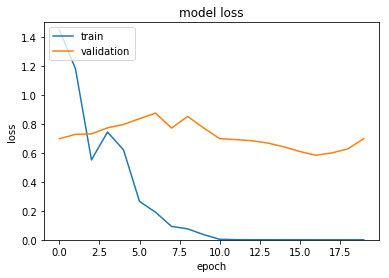

In [17]:
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.ylim(0,1.5)
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

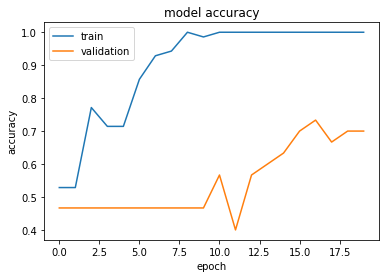

In [18]:
plt.plot(m.history['acc'])
plt.plot(m.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [54]:
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

<class 'numpy.ndarray'>


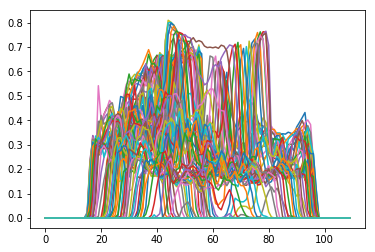

In [61]:
n_i, n_j, n_k, g = X[0].shape
fig = plt.plot(X[0][55].reshape(110,110))
print(type(X))

In [15]:
model1.summary()

Model: "HappyModel"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 110, 110, 11 0                                            
__________________________________________________________________________________________________
conv1 (Conv3D)                  (None, 110, 110, 110 896         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_47 (BatchNo (None, 110, 110, 110 128         conv1[0][0]                      
__________________________________________________________________________________________________
re_lu_46 (ReLU)                 (None, 110, 110, 110 0           batch_normalization_47[0][0]     
_________________________________________________________________________________________

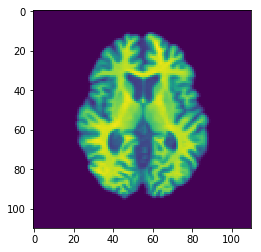

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(np.flip(X[100][:,:,55].reshape(110,110).T,axis=0))